# 1.单变量线性回归
导入需要的包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'ex1data1.txt'
data = pd.read_csv(path, header = None, names = ['Population','Profit'])
data.head()#预览数据

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


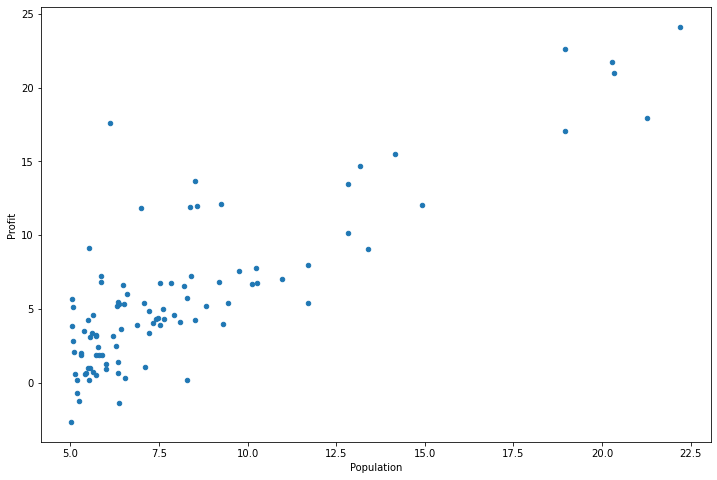

In [2]:
data.describe() #更详细的数据，%25的意思是第%25的数据
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

In [3]:
 def computeCost(X,y,theta):
        
        #X乘以theta的转置，np.power( ,n)其中n表示n次方
        inner = np.power(((X*theta.T)-y),2)
        
        return np.sum(inner)/(2*len(X))
    
data.insert(0,'ones',1)
    
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols] #最后一列

#将向量转换为矩阵
X = np.matrix(X.values)
y = np.matrix(y.values)
#先生成向量再转换为矩阵
theta = np.matrix(np.array([0,0]))

X.shape,y.shape,theta.shape

#计算代价函数
computeCost(X,y,theta)


32.072733877455676

# 2 2.batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

Text(0.5, 1.0, 'Prediction Profit vs. Population Size')

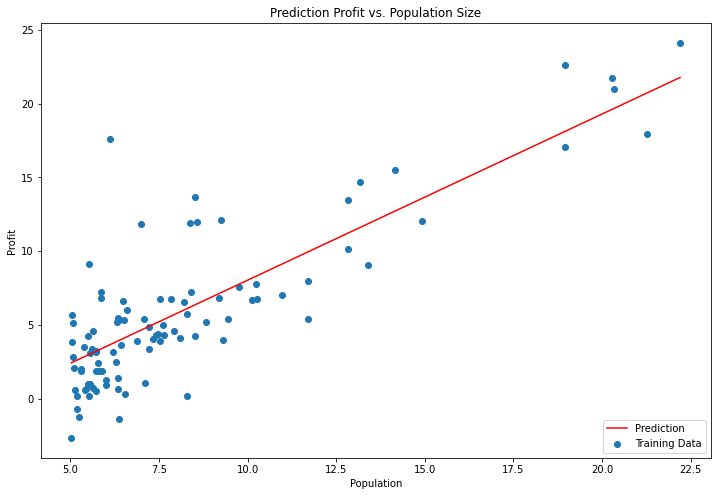

In [4]:
#iters是迭代的次数
def gradientDescent(X,y,theta,alpha,iters):
    
    temp = np.matrix(np.zeros(theta.shape))#构建等值的临时零值矩阵
    
    #ravel将多维降为一维，而这里theta实际上就是（1，2），parameter为theta的列数=2
    parameters = int(theta.ravel().shape[1])
    #保存每一次迭代后的cost
    cost = np.zeros(iters)
    
    for i in range(iters):
        
        error = (X * theta.T) - y
        
        for j in range(parameters): 
            
            #np.multiply()这两个数组的对应元素进行计算内积
            term = np.multiply(error,X[:,j]) 
            temp[0,j] = theta[0,j] - (alpha / len(X) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X,y,theta)
    
    #theta返回的是当前迭代次数的theta，cost返回的是所有的cost
    return theta, cost

alpha = 0.01
iters = 1000
g,cost = gradientDescent(X,y,theta,alpha,iters)

#画出回归拟合和原始的数据散点图
#横坐标的x值选择X最大最小平均取一百个数
x = np.linspace(data.Population.min(),data.Population.max(),100)
f = g[0,0] + (g[0,1]*x)
#plt.subplots()函数的返回值赋值给fig和ax两个变量
fig,ax = plt.subplots(figsize = (12,8))
#把直线画上去
ax.plot(x,f,'r',label = 'Prediction')
#把数据集散点图画上去
ax.scatter(data.Population,data.Profit,label = 'Training Data')
#图例放在第四象限
ax.legend(loc=4)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Prediction Profit vs. Population Size')

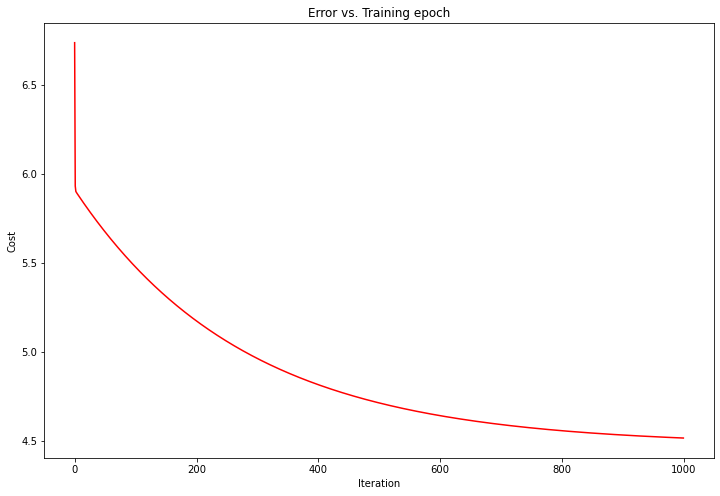

In [5]:
#画出cost函数随着迭代次数而变化的值
fig,ax = plt.subplots(figsize = (12,8))
#np.arange() 函数返回一个有终点和起点的固定步长的排列
ax.plot(np.arange(iters),cost,'r') 
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training epoch')
plt.show()

## 3.多变量线性回归

In [6]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header = None, names = ['Size','Bedroom','Price'])
data2.head()#预览数据

#特征归一化,data2.std()样本标准偏差
data2 = (data2 - data2.mean())/data2.std()
data2.head()

,Size,Bedroom,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


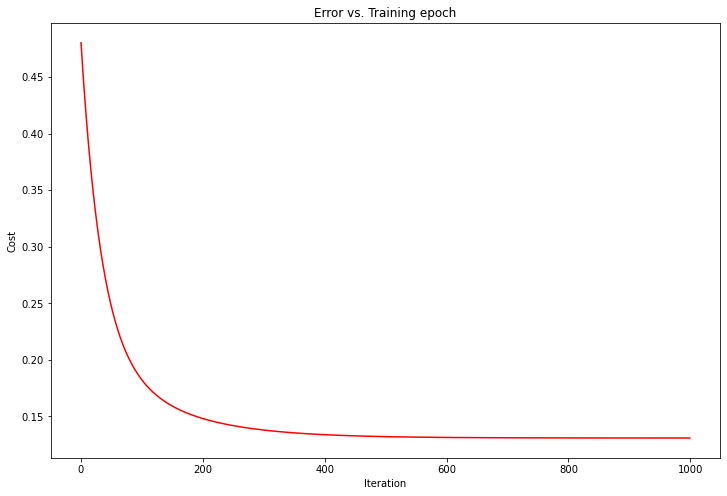

In [7]:
data2.insert(0,'Ones',1)    
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols] #最后一列

#将向量转换为矩阵
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
#先生成向量再转换为矩阵
theta2 = np.matrix(np.array([0,0,0]))

g2,cost2 = gradientDescent(X2,y2,theta2,alpha,iters)

computeCost(X2,y2,g2)

#画出cost函数随着迭代次数而变化的值
fig,ax = plt.subplots(figsize = (12,8))
#np.arange() 函数返回一个有终点和起点的固定步长的排列
ax.plot(np.arange(iters),cost2,'r') 
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training epoch')
plt.show()


# 4.normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [8]:
def nomalEqn(X,y):
    
    theta = np.linalg.inv(X.T*X)*X.T*y
    
    return theta

#梯度下降和初值有关系，因此得到的不一定是最佳值，正规方程一定是最佳值
final_theta2 = nomalEqn(X,y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])